In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import spikeinterface as si
import spikeinterface.preprocessing as spre
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw

from pathlib import Path
import numpy as np
import pickle
import json
import shutil

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib widget

In [4]:
data_folder = Path("../data")
results_folder = Path("../results")

In [5]:
hybrid_data = data_folder / "hybrid_test"
study_folder = results_folder / "hybrid_study"

In [6]:
study = sc.GroundTruthStudy(study_folder)


KeyboardInterrupt



In [ ]:
# TODO: add relative to to dump comparison
# TODO: check if read-only

In [ ]:
comparison_class = sc.GroundTruthComparison

case_keys = study.cases.keys()
for key in case_keys:
    dataset_key = study.cases[key]["dataset"]
    _, gt_sorting = study.datasets[dataset_key]
    sorting = study.sortings[key]
    if sorting is None:
        study.comparisons[key] = None
        continue
    comp = comparison_class(gt_sorting, sorting)
    study.comparisons[key] = comp

In [ ]:
df_by_unit = study.get_performance_by_unit()

In [ ]:
df_by_unit

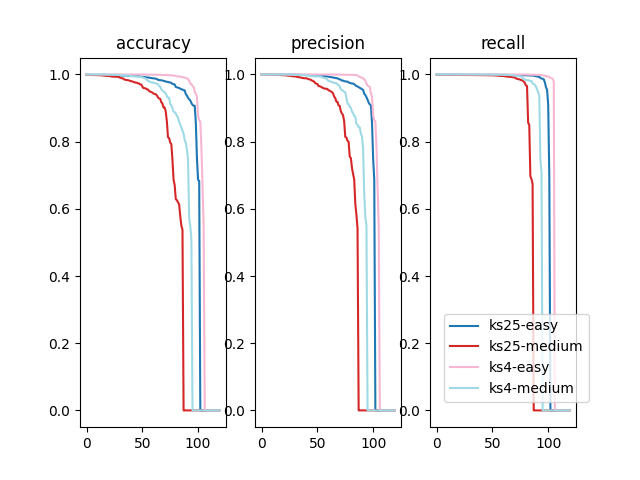

In [30]:
w = sw.plot_study_performances(study, levels=("sorter", "complexity"))

In [33]:
w.figure.savefig(results_folder / "performances.pdf")

In [34]:
# debug other plots

<Axes: xlabel='sorter', ylabel='accuracy'>

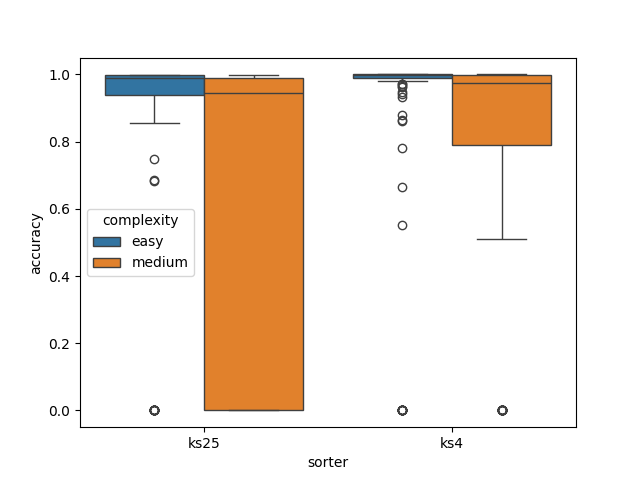

In [40]:
plt.figure()
sns.boxplot(data=df_by_unit.reset_index(), x="sorter", y="accuracy", hue="complexity")

In [41]:
run_times = study.get_run_times()

In [49]:
import pandas as pd

if case_keys is None:
    case_keys = self.cases.keys()

log_folder = study.folder / "sortings" / "run_logs"

run_times = {}
for key in case_keys:
    log_file = log_folder / f"{study.key_to_str(key)}.json"
    with open(log_file, mode="r") as logfile:
        log = json.load(logfile)
        run_time = log.get("run_time", None)
    run_times[key] = run_time

index = pd.MultiIndex.from_tuples(case_keys, names=study.levels)

run_times =  pd.DataFrame({"run_times": run_times}, index=index)

<Axes: xlabel='sorter', ylabel='run_times'>

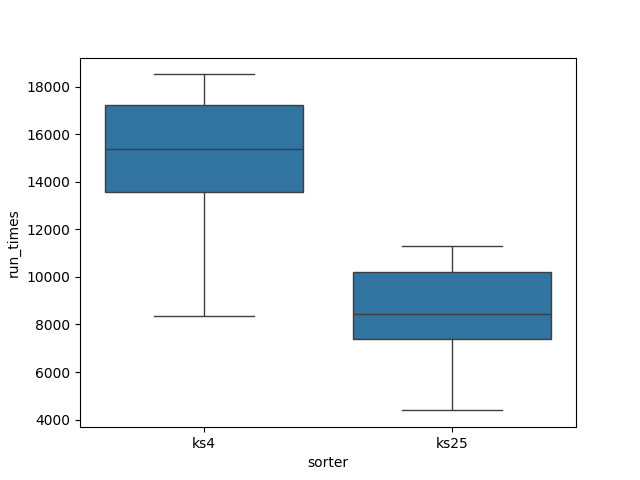

In [51]:
plt.figure()
sns.boxplot(run_times, x="sorter", y="run_times")

In [55]:
study.get_count_units()

/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:643: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:644: PerformanceWarning: indexing past lexsort depth may impact performance.
  if comp.exhaustive_gt:
/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:645: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_redundant"] = comp.count_redundant_units(redundant_score)


,,,,num_gt,num_sorter,num_well_detected
sorter,stream,complexity,case,,,
ks4,experiment1_ProbeA_recording1,easy,0,10.0,595.0,10.0
ks25,experiment1_ProbeA_recording1,easy,0,10.0,432.0,9.0
ks4,experiment1_ProbeA_recording1,easy,1,10.0,584.0,10.0
ks25,experiment1_ProbeA_recording1,easy,1,10.0,508.0,10.0
ks4,experiment1_ProbeA_recording1,medium,0,10.0,580.0,9.0
ks25,experiment1_ProbeA_recording1,medium,0,10.0,452.0,5.0
ks4,experiment1_ProbeA_recording1,medium,1,10.0,589.0,7.0
ks25,experiment1_ProbeA_recording1,medium,1,10.0,482.0,6.0
ks4,experiment1_ProbeB_recording1,easy,0,10.0,846.0,9.0


/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:640: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_gt"] = len(gt_sorting.get_unit_ids())
/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:641: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_sorter"] = len(sorting.get_unit_ids())
/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:642: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_well_detected"] = comp.count_well_detected_units(well_detected_score)


TypeError: only length-1 arrays can be converted to Python scalars

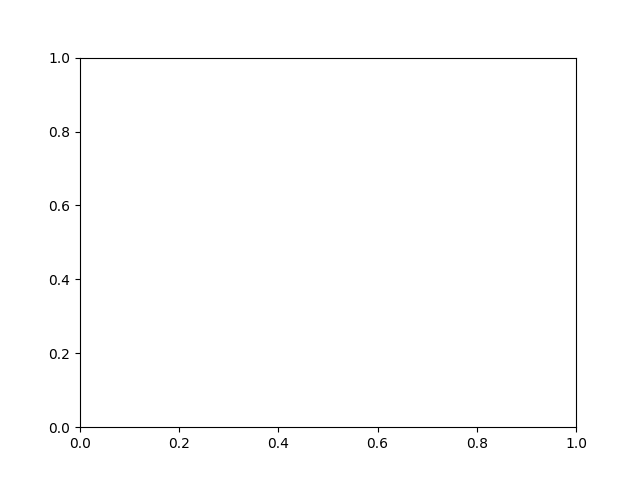

In [32]:
# w1 = sw.plot_study_unit_counts(study, levels=("sorter", "complexity"))

<Axes: xlabel='sorter', ylabel='accuracy'>

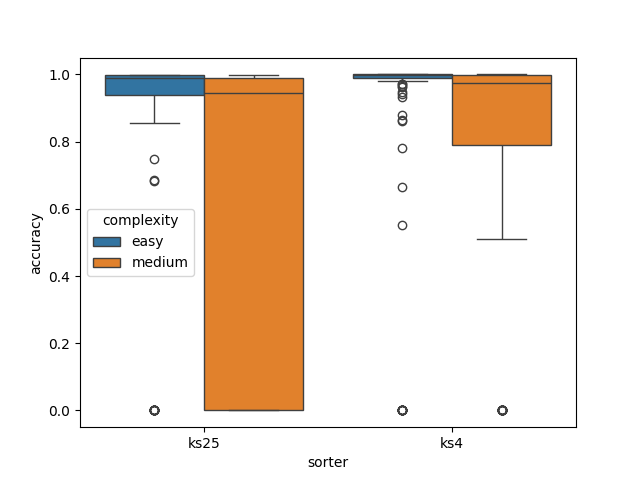

In [33]:
case_keys = list(study.cases.keys())

In [55]:
l = df_by_unit.index.levels

In [66]:
df_by_unit.index.droplevel(("stream", "case")).unique()

MultiIndex([('ks25',   'easy'),
            ('ks25', 'medium'),
            ( 'ks4',   'easy'),
            ( 'ks4', 'medium')],
           names=['sorter', 'complexity'])

In [58]:
df_by_unit.droplevel(("stream", "case"))

gt_unit_id  accuracy    recall precision  \
sorter complexity                                             
ks25   easy                78  0.996667   0.99738  0.999284   
       easy              1606  0.998573  0.998573       1.0   
       easy               506  0.976142  0.997446  0.978588   
       easy              1367  0.997401  0.997873  0.999527   
       easy              1446         0         0         0   
...                       ...       ...       ...       ...   
ks4    medium            1680  0.871491  0.996466  0.874193   
       medium             819         0         0         0   
       medium            1690         0         0         0   
       medium            1827  0.991564  0.997575   0.99396   
       medium            1229  0.963545  0.985152  0.977744   

                  false_discovery_rate miss_rate  
sorter complexity                                 
ks25   easy                   0.000716   0.00262  
       easy                        0.0  0.001427  
       easy                   0.021412  0.002554  
       easy                   0.000473  0.002127  
       easy                          0         0  
...                                ...       ...  
ks4    medium                 0.125807  0.003534  
       medium                        0         0  
       medium                        0         0  
       medium                  0.00604  0.002425  
       medium                 0.022256  0.014848  

[480 rows x 6 columns]

In [63]:
from spikeinterface.widgets.base import BaseWidget, to_attr

class StudyUnitCountsWidget(BaseWidget):
    """
    Plot unit counts for a study: "num_well_detected", "num_false_positive", "num_redundant", "num_overmerged"


    Parameters
    ----------
    study : GroundTruthStudy
        A study object.
    case_keys : list or None, default: None
        A selection of cases to plot, if None, then all cases are plotted.
    levels : str or list-like or None, default: None
        A selection of levels to group cases by, if None, then all
        cases are treated as separate.
    """

    def __init__(
        self,
        study,
        case_keys=None,
        levels=None,
        backend=None,
        **backend_kwargs,
    ):
        plot_data = dict(
            study=study, count_units=study.get_count_units(case_keys=case_keys), case_keys=case_keys, levels=levels
        )

        BaseWidget.__init__(self, plot_data, backend=backend, **backend_kwargs)

    def plot_matplotlib(self, data_plot, **backend_kwargs):
        from spikeinterface.widgets.utils_matplotlib import make_mpl_figure
        from spikeinterface.widgets.utils import get_some_colors

        import pandas as pd

        dp = to_attr(data_plot)
        count_units = dp.count_units
        study = dp.study

        self.figure, self.axes, self.ax = make_mpl_figure(**backend_kwargs)

        if dp.case_keys is None:
            case_keys = list(study.cases.keys())
            labels = {key: study.cases[key]["label"] for key in case_keys}

        columns = count_units.columns.tolist()
        columns.remove("num_gt")
        columns.remove("num_sorter")

        if dp.levels is not None:
            drop_levels = [l for l in study.levels if l not in dp.levels]
            count_units = count_units.droplevel(drop_levels).sort_index()
            case_keys = list(np.unique(count_units.index))
            if isinstance(count_units.index, pd.MultiIndex):
                labels = {key: "-".join(key) for key in case_keys}
            else:
                labels = {key: key for key in case_keys}

        ncol = len(columns)

        colors = get_some_colors(columns, color_engine="auto", map_name="hot")
        colors["num_well_detected"] = "green"

        xticklabels = []
        # TODO fix this!
        for i, key in enumerate(case_keys):
            for c, col in enumerate(columns):
                x = i + 1 + c / (ncol + 1)
                y = count_units.loc[key, col]
                if not "well_detected" in col:
                    y = -y

                print(x, y)
                if i == 0:
                    label = col.replace("num_", "").replace("_", " ").title()
                else:
                    label = None

                self.ax.bar([x], [y], width=1 / (ncol + 2), label=label, color=colors[col])
            xticklabels.append(labels[key])

        self.ax.set_xticks(np.arange(len(dp.case_keys)) + 1)
        self.ax.set_xticklabels(xticklabels)
        self.ax.legend()

In [64]:
levels=("sorter", "complexity")

In [65]:
count_units = study.get_count_units()
drop_levels = [l for l in study.levels if l not in levels]
count_units = count_units.droplevel(drop_levels).sort_index()
case_keys = list(np.unique(count_units.index))

/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:643: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:644: PerformanceWarning: indexing past lexsort depth may impact performance.
  if comp.exhaustive_gt:
/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:645: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_redundant"] = comp.count_redundant_units(redundant_score)


In [70]:
case_keys

[('ks25', 'easy'), ('ks25', 'medium'), ('ks4', 'easy'), ('ks4', 'medium')]

1.0 sorter  complexity
ks25    easy           9.0
        easy          10.0
        easy          10.0
        easy          10.0
        easy           4.0
        easy           1.0
        easy          10.0
        easy           9.0
        easy          10.0
        easy           7.0
        easy          10.0
        easy           9.0
Name: num_well_detected, dtype: float64


/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:643: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_gt"] = len(gt_sorting.get_unit_ids())
/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:644: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_sorter"] = len(sorting.get_unit_ids())
/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:645: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_well_detected"] = comp.count_well_detected_units(well_detected_score)


TypeError: only length-1 arrays can be converted to Python scalars

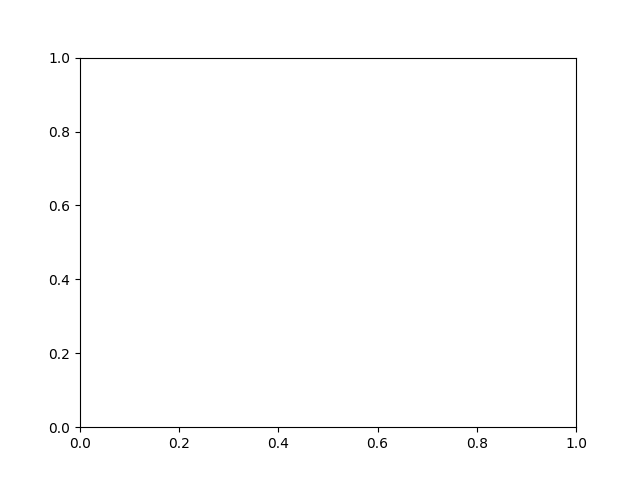

In [69]:
StudyUnitCountsWidget(study, levels=("sorter", "complexity"))

In [73]:
if drop_levels is not None:
    perfs = perfs.droplevel(drop_levels)
    case_keys = list(np.unique(perfs.index))

In [88]:
study.levels

['sorter', 'stream', 'complexity', 'case']

# DEBUG

In [6]:
hybrid_folder = hybrid_data
verbose = True

In [7]:
from run_capsule import create_study_folder

In [8]:
study = create_study_folder(hybrid_data, study_folder, debug_cases=8)

Found 36 recordings and 2 sorter runs
Only loading 8 debug cases
	Loading case experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1_easy_0
		Loading GT sorting
		Loading hybrid recording
	Loading case experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1_easy_1
		Loading GT sorting
		Loading hybrid recording
	Loading case experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1_hard_0
		Loading GT sorting
		Loading hybrid recording
	Loading case experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1_hard_1
		Loading GT sorting
		Loading hybrid recording
	Loading case experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1_medium_0
		Loading GT sorting
		Loading hybrid recording
	Loading case experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1_medium_1
		Loading GT sorting
		Loading hybrid recording
	Loading case experiment1_Record Node 103#Neuropix-PXI-100.ProbeB-AP_recording1_easy_0
		Loading GT sorting
		Loading hyb

In [9]:
si.set_global_job_kwargs(n_jobs=-1)

In [10]:
print(f"\tRunning comparisons")
study.run_comparisons()

print(f"\tCreating GT sorting analyzers")
study.create_sorting_analyzer_gt()

	Running comparisons
	Creating GT sorting analyzers


estimate_sparsity:   0%|          | 0/30 [00:00<?, ?it/s]

estimate_templates_with_accumulator:   0%|          | 0/30 [00:00<?, ?it/s]

estimate_sparsity:   0%|          | 0/30 [00:00<?, ?it/s]

estimate_templates_with_accumulator:   0%|          | 0/30 [00:00<?, ?it/s]

estimate_sparsity:   0%|          | 0/30 [00:00<?, ?it/s]

estimate_templates_with_accumulator:   0%|          | 0/30 [00:00<?, ?it/s]

estimate_sparsity:   0%|          | 0/30 [00:00<?, ?it/s]

estimate_templates_with_accumulator:   0%|          | 0/30 [00:00<?, ?it/s]

estimate_sparsity:   0%|          | 0/30 [00:00<?, ?it/s]

estimate_templates_with_accumulator:   0%|          | 0/30 [00:00<?, ?it/s]

estimate_sparsity:   0%|          | 0/30 [00:00<?, ?it/s]

estimate_templates_with_accumulator:   0%|          | 0/30 [00:00<?, ?it/s]

estimate_sparsity:   0%|          | 0/30 [00:00<?, ?it/s]

estimate_templates_with_accumulator:   0%|          | 0/30 [00:00<?, ?it/s]

estimate_sparsity:   0%|          | 0/30 [00:00<?, ?it/s]

estimate_templates_with_accumulator:   0%|          | 0/30 [00:00<?, ?it/s]

In [11]:
study.compute_metrics()

In [12]:
case_key = list(study.cases.keys())[5]

stream_name = case_key[1]

In [13]:
motion_info = spre.load_motion_info(hybrid_folder / "motion" / stream_name)

In [14]:
analyzer_gt = study.get_sorting_analyzer(case_key)
recording = analyzer_gt.recording

In [15]:
analyzer_gt.compute("spike_locations", save=False)

spike_locations:   0%|          | 0/30 [00:00<?, ?it/s]

In [16]:
motion = motion_info["motion"]

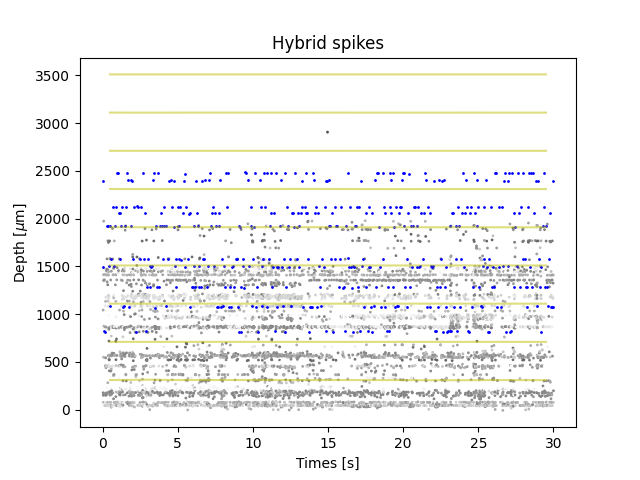

In [17]:
w = sw.plot_drift_raster_map(
    peaks=motion_info["peaks"],
    peak_locations=motion_info["peak_locations"],
    recording=recording,
    cmap="Greys_r",
    scatter_decimate=1,
)
ax = w.ax
analyzer = study
_ = sw.plot_drift_raster_map(
    sorting_analyzer=analyzer_gt,
    color_amplitude=False,
    color="b",
    scatter_decimate=10,
    ax=w.ax
)
ax.set_title("Hybrid spikes")

motion = motion_info["motion"]
_ = ax.plot(
    motion.temporal_bins_s[0],
    motion.spatial_bins_um + motion.displacement[0],
    color="y",
    alpha=0.5
)

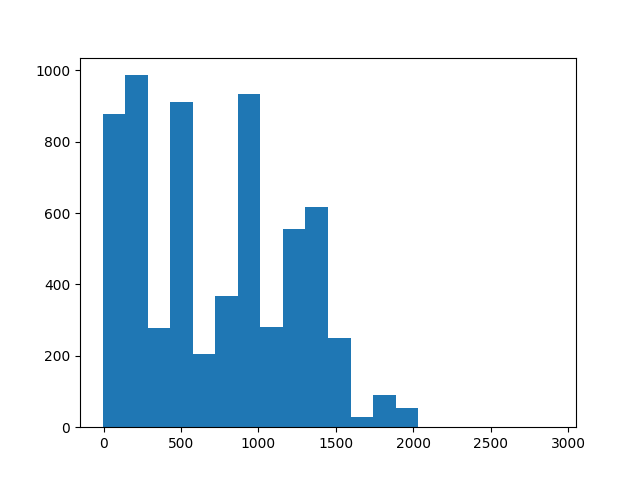

In [18]:
plt.figure()
_ = plt.hist(motion_info["peak_locations"]["y"], bins=20)

In [19]:
metrics = study.get_metrics(case_keys=None)

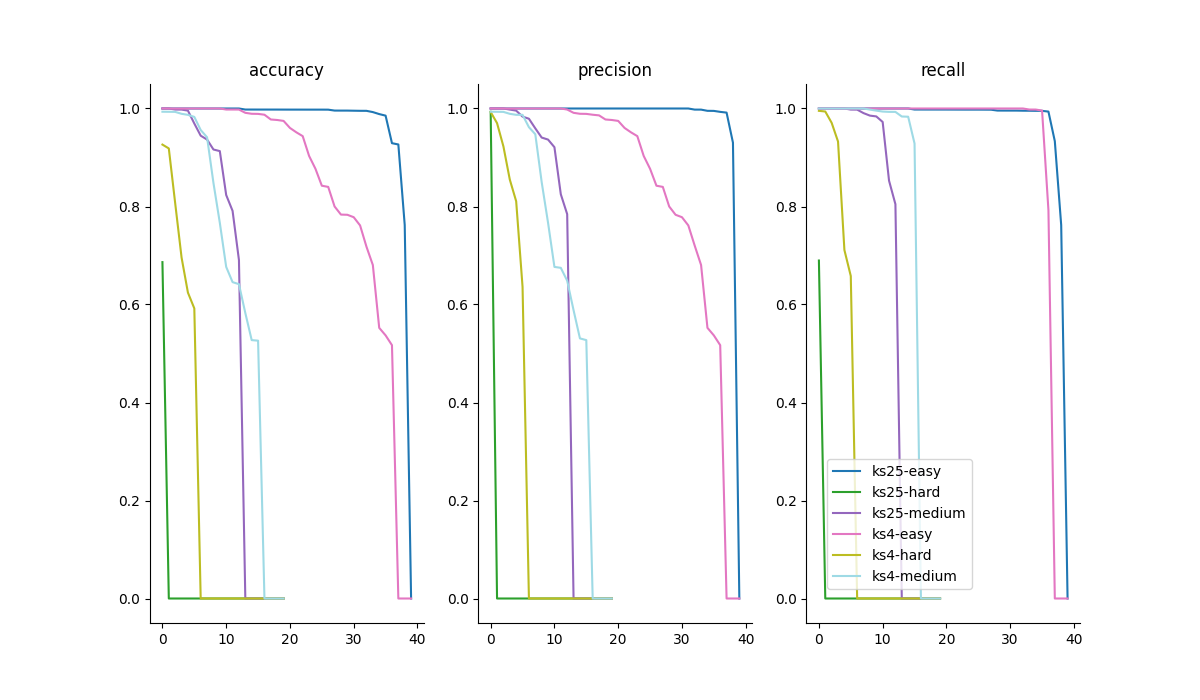

In [20]:
w = sw.plot_study_performances(study, levels=("sorter", "complexity"), figsize=(12, 7))

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 52.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 47.5% of the points cannot be placed; y

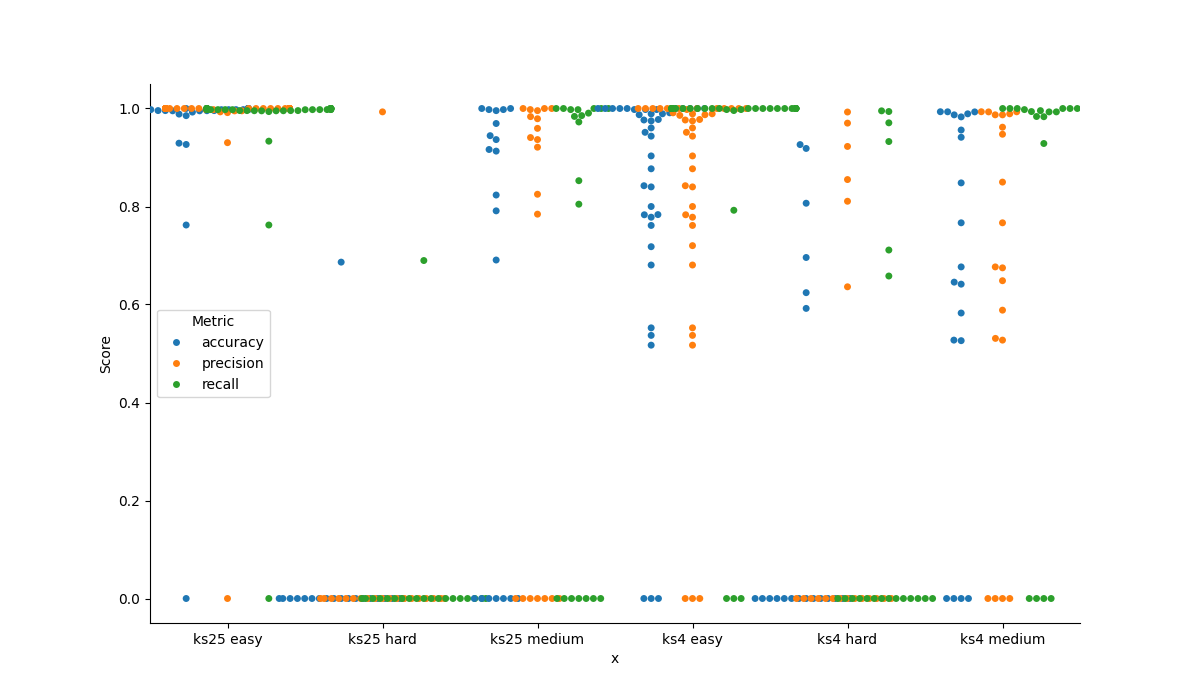

In [21]:
w = sw.plot_study_performances(study, levels=("sorter", "complexity"), figsize=(12, 7), mode="swarm")

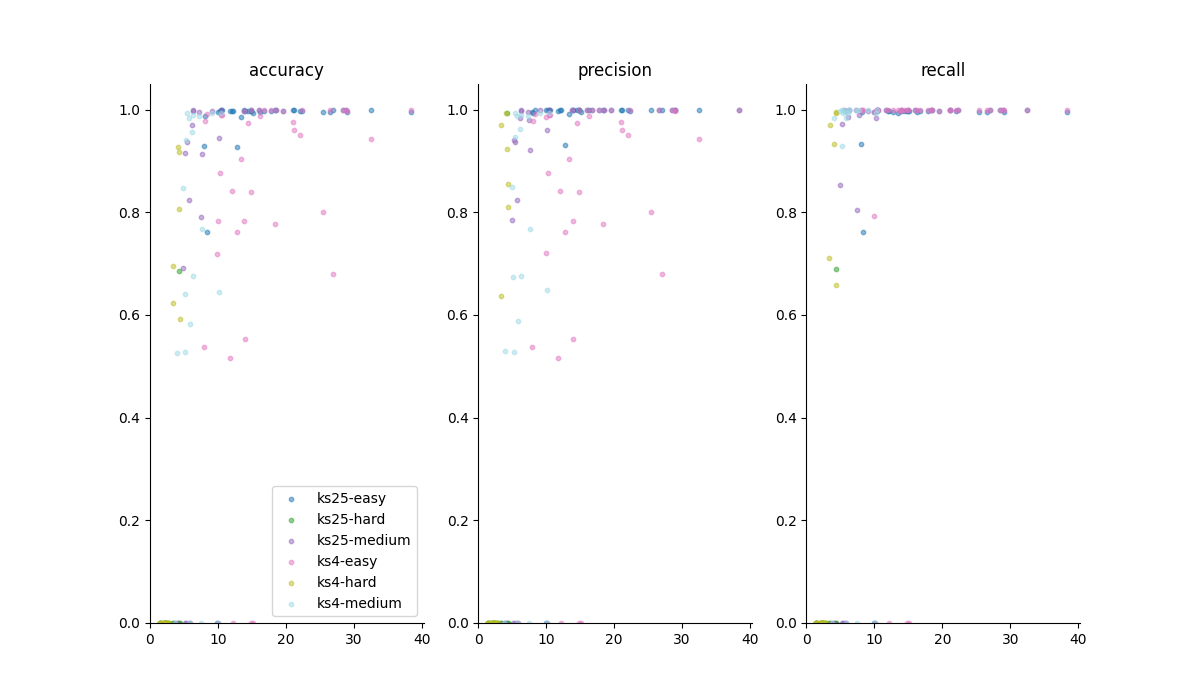

In [22]:
w = sw.plot_study_performances(study, levels=("sorter", "complexity"), figsize=(12, 7), mode="snr")

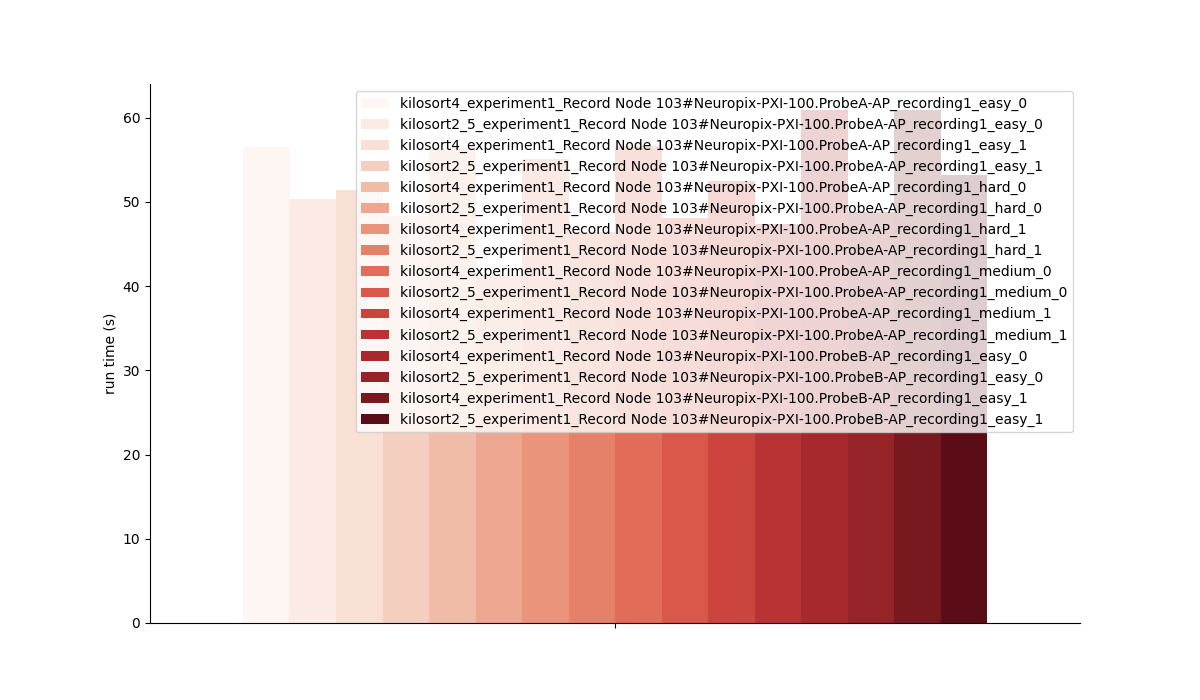

In [23]:
w = sw.plot_study_run_times(study, figsize=(12, 7), cmap="Reds")

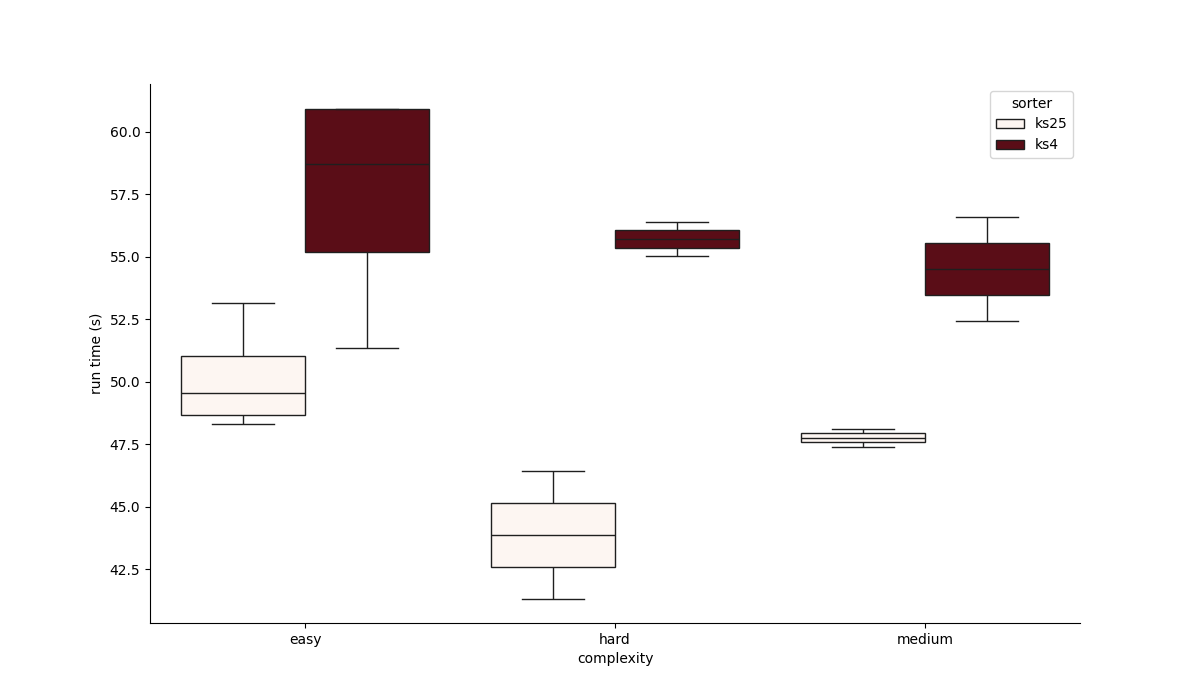

In [24]:
w = sw.plot_study_run_times(study, levels=("complexity", "sorter"), figsize=(12, 7), cmap="Reds")

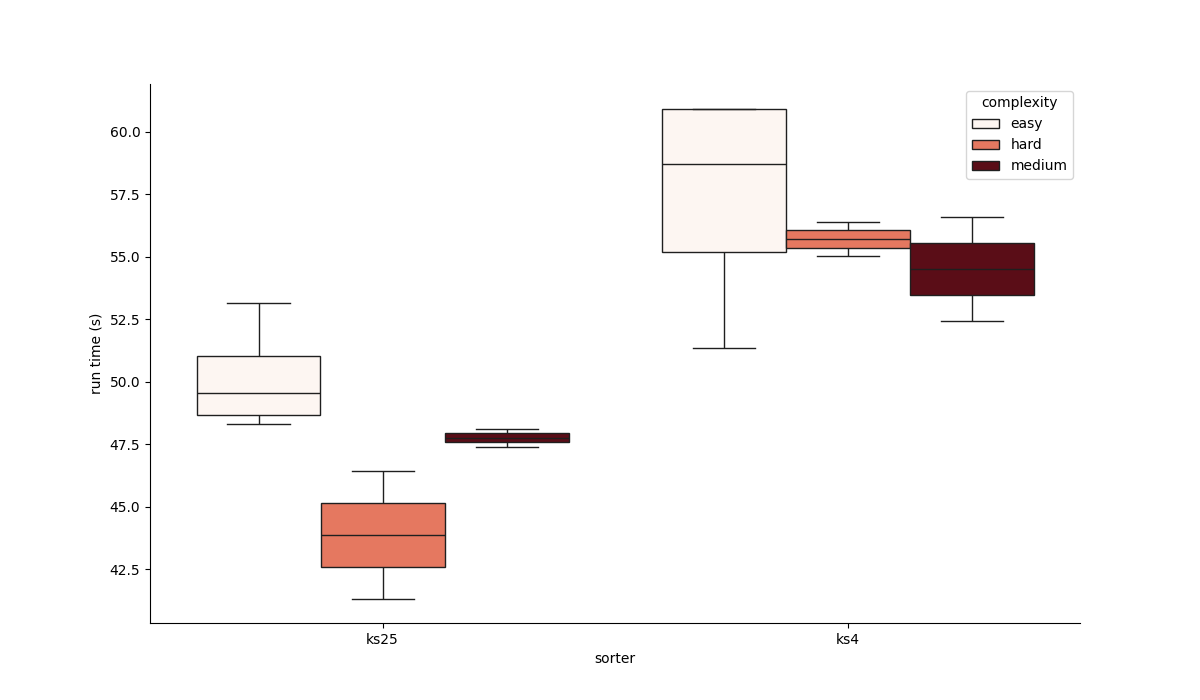

In [25]:
w = sw.plot_study_run_times(study, levels=("sorter", "complexity"), figsize=(12, 7), cmap="Reds")

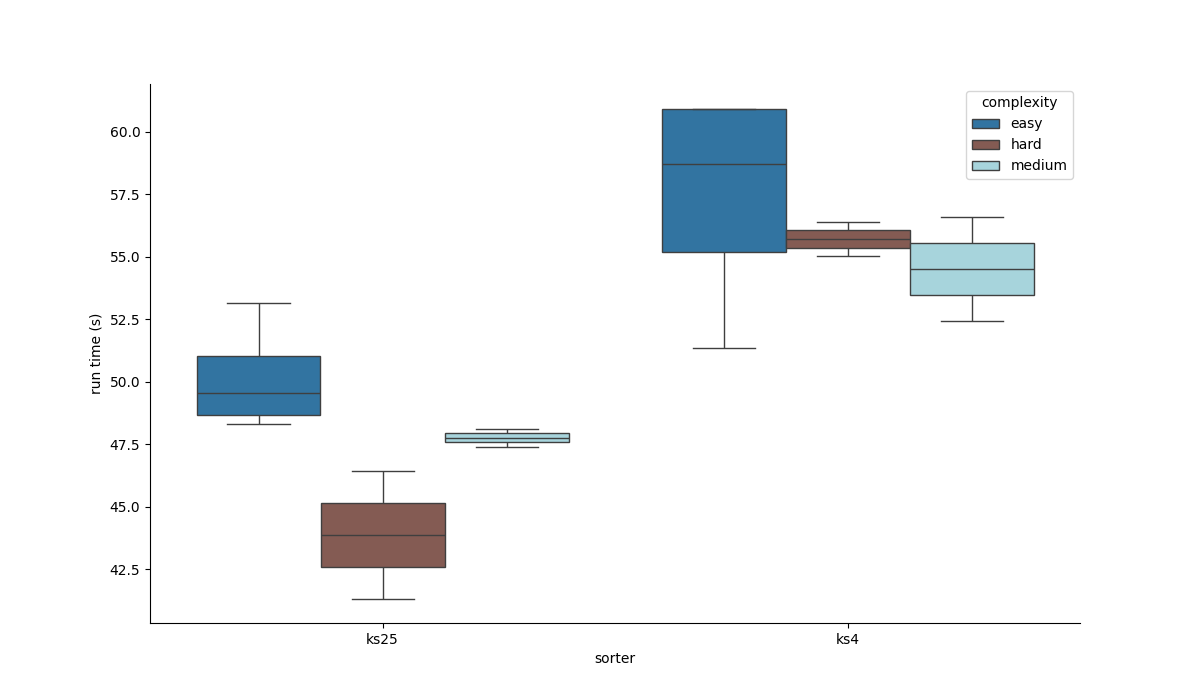

In [26]:
w = sw.plot_study_run_times(study, levels=("sorter", "complexity"), figsize=(12, 7))

In [346]:
labels = {key: f"case-{i}" for i, key in enumerate(list(study.cases))}

/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:664: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_gt"] = len(gt_sorting.get_unit_ids())
/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:665: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_sorter"] = len(sorting.get_unit_ids())
/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:666: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_well_detected"] = comp.count_well_detected_units(well_detected_score)
/root/capsule/code/spikeinterface/src/spikeinterface/widgets/gtstudy.py:215: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = self.ax.set_xticklabels(self.ax.get_xticklabels(), rotation=90)


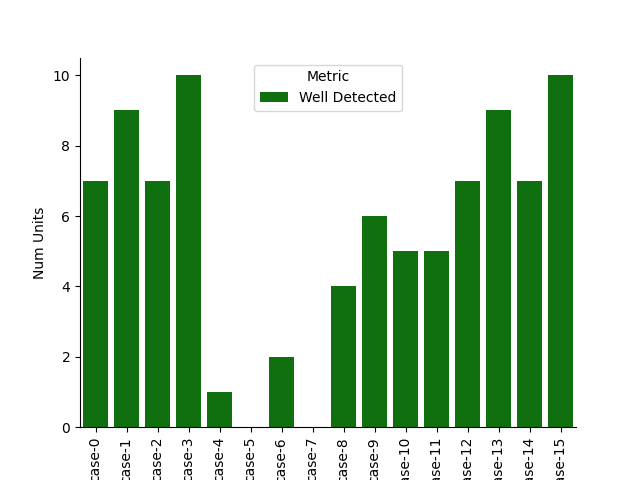

In [348]:
sw.plot_study_unit_counts(study, labels=labels)

/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:664: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_gt"] = len(gt_sorting.get_unit_ids())
/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:665: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_sorter"] = len(sorting.get_unit_ids())
/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:666: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_well_detected"] = comp.count_well_detected_units(well_detected_score)
/root/capsule/code/spikeinterface/src/spikeinterface/widgets/gtstudy.py:215: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  df = count_units


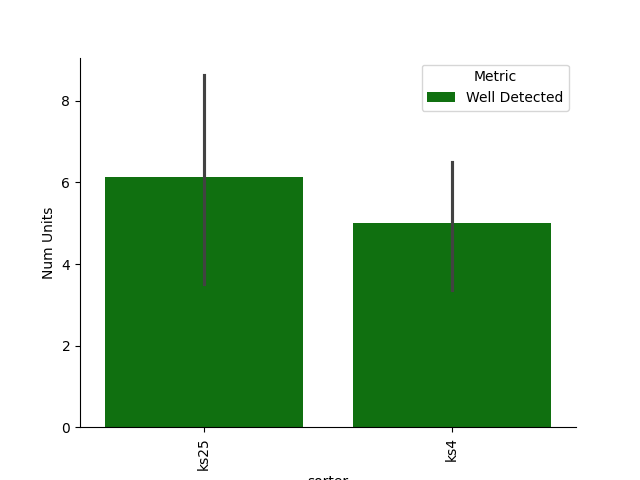

In [345]:
sw.plot_study_unit_counts(study, levels="sorter")

/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:664: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_gt"] = len(gt_sorting.get_unit_ids())
/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:665: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_sorter"] = len(sorting.get_unit_ids())
/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:666: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_well_detected"] = comp.count_well_detected_units(well_detected_score)
/root/capsule/code/spikeinterface/src/spikeinterface/widgets/gtstudy.py:235: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Which performances to plot ("accuracy", "precision", "recall")


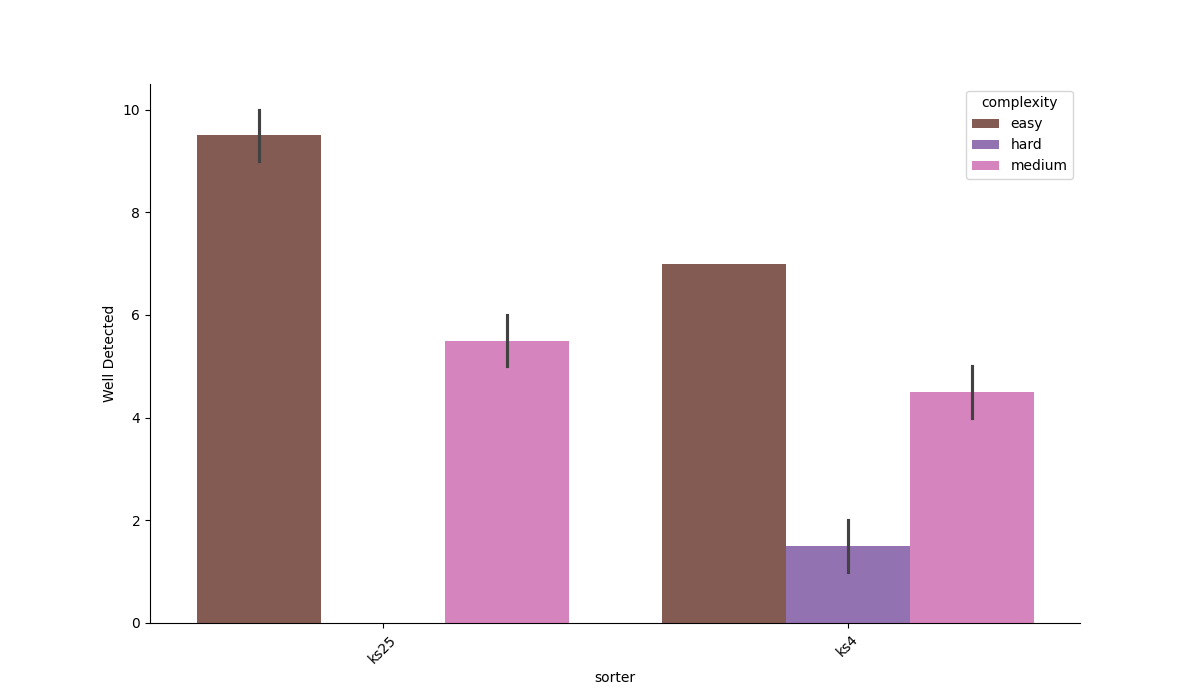

In [350]:
sw.plot_study_unit_counts(study, levels=("sorter", "complexity"), figsize=(12, 7))

/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:664: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_gt"] = len(gt_sorting.get_unit_ids())
/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:665: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_sorter"] = len(sorting.get_unit_ids())
/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:666: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_well_detected"] = comp.count_well_detected_units(well_detected_score)
/root/capsule/code/spikeinterface/src/spikeinterface/widgets/gtstudy.py:215: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  df = count_units


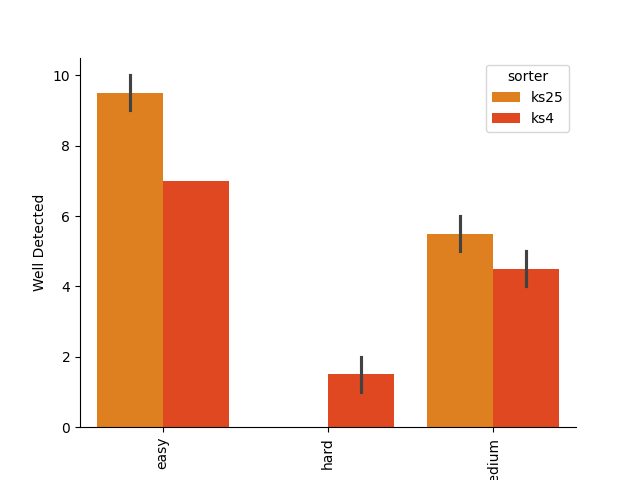

In [344]:
sw.plot_study_unit_counts(study, levels=("complexity", "sorter"))

In [340]:
count_units

,,,,num_gt,num_sorter,num_well_detected
sorter,stream,complexity,case,,,
ks4,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,easy,0,10.0,105.0,7.0
ks25,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,easy,0,10.0,166.0,9.0
ks4,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,easy,1,10.0,96.0,7.0
ks25,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,easy,1,10.0,151.0,10.0
ks4,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,hard,0,10.0,92.0,1.0
ks25,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,hard,0,10.0,139.0,0.0
ks4,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,hard,1,10.0,90.0,2.0
ks25,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,hard,1,10.0,160.0,0.0
ks4,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,medium,0,10.0,103.0,4.0


In [ ]:
sw.plot_study_unit_counts(study, levels=("sorter", "complexity"))

In [202]:
from spikeinterface.widgets.gtstudy import handle_levels
from spikeinterface.widgets.utils import get_some_colors

In [330]:
levels = None
# levels = ["sorter"]
# levels = ["sorter", "complexity"]

/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:664: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_gt"] = len(gt_sorting.get_unit_ids())
/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:665: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_sorter"] = len(sorting.get_unit_ids())
/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:666: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_well_detected"] = comp.count_well_detected_units(well_detected_score)
/tmp/ipykernel_3670/3426979600.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


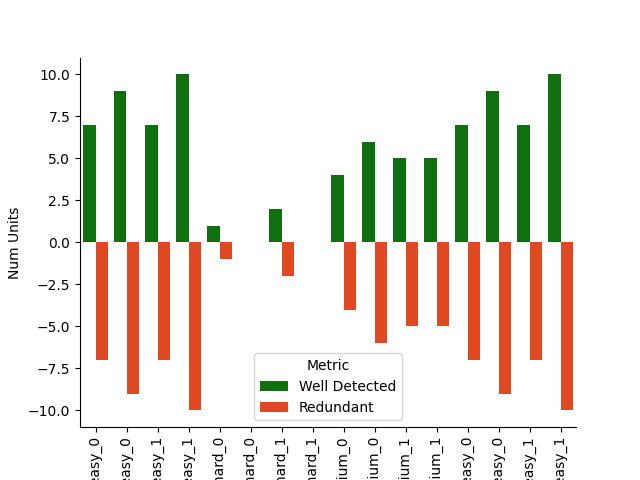

In [331]:
count_units = study.get_count_units()
case_keys = None
count_units, case_keys, labels = handle_levels(count_units, study, case_keys, levels)
count_units = count_units.drop(columns=["num_gt", "num_sorter"])

# test having another entry
count_units.loc[:, "num_redundant"] = count_units["num_well_detected"].values

for col in count_units.columns:
    vals = count_units[col].values
    if not "well_detected" in col:
        vals = -vals
    col_name = col.replace("num_", "").replace("_", " ").title()
    count_units.loc[:, col_name] = vals
    del count_units[col]

columns = count_units.columns.tolist()
ncol = len(columns)

if levels is None:
    count_units.loc[:, "Label"] = labels
count_units = count_units.reset_index()

if levels is not None:
    if len(levels) == 1:
        var_name = "Metric"
        x = levels[0]
        y = "Num Units"
        hue = "Metric"
        color_list = columns
    else:
        assert len(columns) == 1
        var_name = None
        x, hue = levels
        y = columns[0]
        color_list = list(np.unique(count_units[hue]))
else:
    levels = study.levels + ["Label"]
    var_name = "Metric"
    x = "Label"
    y = "Num Units"
    hue = "Metric"
    color_list = columns

colors = get_some_colors(color_list, color_engine="auto", map_name="hot")
colors["Well Detected"] = "green"

if var_name is not None:
    df = count_units.melt(id_vars=levels, var_name=var_name, value_name="Num Units")
else:
    df = count_units
    
plt.figure()
ax = sns.barplot(df, x=x, hue=hue, y=y, palette=colors)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.despine(ax=ax)

In [316]:
df

,sorter,complexity,Well Detected
0,ks25,easy,9.0
1,ks25,easy,10.0
2,ks25,easy,9.0
3,ks25,easy,10.0
4,ks25,hard,0.0
5,ks25,hard,0.0
6,ks25,medium,6.0
7,ks25,medium,5.0
8,ks4,easy,7.0
9,ks4,easy,7.0


/tmp/ipykernel_3670/3390785132.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


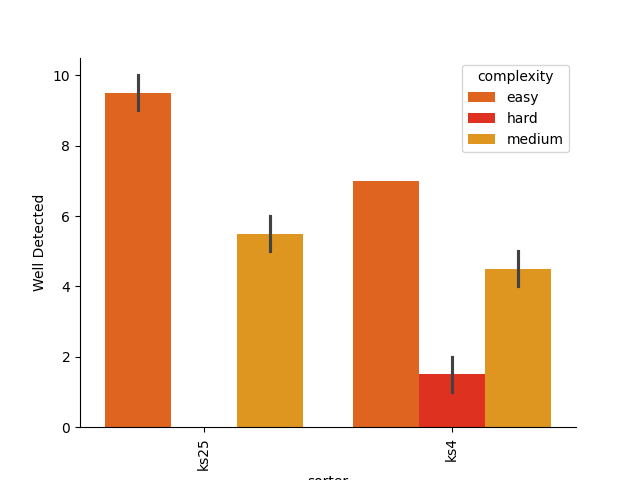

In [199]:
count_units

,num_gt,num_sorter,num_well_detected
sorter,,,
ks25,10.0,166.0,9.0
ks25,10.0,151.0,10.0
ks25,10.0,139.0,0.0
ks25,10.0,160.0,0.0
ks25,10.0,145.0,6.0
ks25,10.0,149.0,5.0
ks25,10.0,270.0,9.0
ks25,10.0,257.0,10.0
ks4,10.0,105.0,7.0


In [ ]:
ncol = len(columns)

colors = get_some_colors(columns, color_engine="auto", map_name="hot")
colors["num_well_detected"] = "green"

xticklabels = []
for i, key in enumerate(case_keys):
    for c, col in enumerate(columns):
        x = i + 1 + c / (ncol + 1)
        y = count_units.loc[key, col]
        print(y)
        if not "well_detected" in col:
            y = -y

        if i == 0:
            label = col.replace("num_", "").replace("_", " ").title()
        else:
            label = None

        self.ax.bar([x], [y], width=1 / (ncol + 2), label=label, color=colors[col])
    xticklabels.append(labels[key])

self.ax.set_xticks(np.arange(len(case_keys)) + 1)
self.ax.set_xticklabels(xticklabels)
self.ax.legend()

In [ ]:
sw.plot_study_unit_counts(study, levels=("sorter", "complexity"))

In [356]:
s = study.get_count_units()
s.to_csv(results_folder / "counts.csv")

/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:664: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_gt"] = len(gt_sorting.get_unit_ids())
/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:665: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_sorter"] = len(sorting.get_unit_ids())
/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:666: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_well_detected"] = comp.count_well_detected_units(well_detected_score)


In [359]:
import pandas as pd

In [360]:
s1 = pd.read_csv(results_folder / "counts.csv", index_col=study.levels)

In [361]:
s1

,,,,num_gt,num_sorter,num_well_detected
sorter,stream,complexity,case,,,
ks4,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,easy,0,10.0,105.0,7.0
ks25,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,easy,0,10.0,166.0,9.0
ks4,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,easy,1,10.0,96.0,7.0
ks25,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,easy,1,10.0,151.0,10.0
ks4,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,hard,0,10.0,92.0,1.0
ks25,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,hard,0,10.0,139.0,0.0
ks4,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,hard,1,10.0,90.0,2.0
ks25,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,hard,1,10.0,160.0,0.0
ks4,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,medium,0,10.0,103.0,4.0


In [352]:
study.get_count_units()
study.get_performance_by_unit()
study.get_run_times()
study.get_metrics()

/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:664: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_gt"] = len(gt_sorting.get_unit_ids())
/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:665: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_sorter"] = len(sorting.get_unit_ids())
/root/capsule/code/spikeinterface/src/spikeinterface/comparison/groundtruthstudy.py:666: PerformanceWarning: indexing past lexsort depth may impact performance.
  count_units.loc[key, "num_well_detected"] = comp.count_well_detected_units(well_detected_score)


,,,,num_gt,num_sorter,num_well_detected
sorter,stream,complexity,case,,,
ks4,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,easy,0,10.0,105.0,7.0
ks25,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,easy,0,10.0,166.0,9.0
ks4,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,easy,1,10.0,96.0,7.0
ks25,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,easy,1,10.0,151.0,10.0
ks4,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,hard,0,10.0,92.0,1.0
ks25,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,hard,0,10.0,139.0,0.0
ks4,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,hard,1,10.0,90.0,2.0
ks25,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,hard,1,10.0,160.0,0.0
ks4,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,medium,0,10.0,103.0,4.0


accuracy  \
sorter stream                                             complexity case             
ks25   experiment1_Record Node 103#Neuropix-PXI-100.Pr... easy       0     0.929204   
                                                                     0     0.995272   
                                                                     0     0.997691   
                                                                     0     0.997732   
                                                                     0            0   
...                                                                             ...   
ks4    experiment1_Record Node 103#Neuropix-PXI-100.Pr... easy       1            0   
                                                                     1     0.778157   
                                                                     1          1.0   
                                                                     1          1.0   
                                                                     1     0.783482   

                                                                             recall  \
sorter stream                                             complexity case             
ks25   experiment1_Record Node 103#Neuropix-PXI-100.Pr... easy       0     0.933333   
                                                                     0     0.995272   
                                                                     0     0.997691   
                                                                     0     0.997732   
                                                                     0            0   
...                                                                             ...   
ks4    experiment1_Record Node 103#Neuropix-PXI-100.Pr... easy       1            0   
                                                                     1          1.0   
                                                                     1          1.0   
                                                                     1          1.0   
                                                                     1     0.792325   

                                                                          precision  \
sorter stream                                             complexity case             
ks25   experiment1_Record Node 103#Neuropix-PXI-100.Pr... easy       0     0.995261   
                                                                     0          1.0   
                                                                     0          1.0   
                                                                     0          1.0   
                                                                     0            0   
...                                                                             ...   
ks4    experiment1_Record Node 103#Neuropix-PXI-100.Pr... easy       1            0   
                                                                     1     0.778157   
                                                                     1          1.0   
                                                                     1          1.0   
                                                                     1     0.985955   

                                                                          false_discovery_rate  \
sorter stream                                             complexity case                        
ks25   experiment1_Record Node 103#Neuropix-PXI-100.Pr... easy       0                0.004739   
                                                                     0                     0.0   
                                                                     0                     0.0   
                                                                     0                     0.0   
                                                                     0                     

,,,,run_time
sorter,stream,complexity,case,
ks4,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,easy,0,56.487786
ks25,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,easy,0,50.330078
ks4,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,easy,1,51.367249
ks25,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,easy,1,48.287715
ks4,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,hard,0,56.403108
ks25,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,hard,0,41.325845
ks4,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,hard,1,55.022138
ks25,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,hard,1,46.433574
ks4,experiment1_Record Node 103#Neuropix-PXI-100.ProbeA-AP_recording1,medium,0,56.590055


firing_rate  \
sorter stream                                             complexity case                
ks4    experiment1_Record Node 103#Neuropix-PXI-100.Pr... easy       0       15.000000   
                                                                     0       14.100000   
                                                                     0       14.433333   
                                                                     0       14.700000   
                                                                     0       15.933333   
...                                                                                ...   
ks25   experiment1_Record Node 103#Neuropix-PXI-100.Pr... easy       1       14.466667   
                                                                     1       15.200000   
                                                                     1       15.800000   
                                                                     1       15.400000   
                                                                     1       14.766667   

                                                                                 snr  \
sorter stream                                             complexity case              
ks4    experiment1_Record Node 103#Neuropix-PXI-100.Pr... easy       0      7.967074   
                                                                     0     26.553316   
                                                                     0     12.042680   
                                                                     0     14.893835   
                                                                     0      9.899759   
...                                                                              ...   
ks25   experiment1_Record Node 103#Neuropix-PXI-100.Pr... easy       1     14.859367   
                                                                     1     18.367641   
                                                                     1     14.896760   
                                                                     1     28.890158   
                                                                     1      9.991356   

                                                                           gt_unit_id  
sorter stream                                             complexity case              
ks4    experiment1_Record Node 103#Neuropix-PXI-100.Pr... easy       0            770  
                                                                     0           1482  
                                                                     0           1212  
                                                                     0            193  
                                                                     0           1239  
...                                                                               ...  
ks25   experiment1_Record Node 103#Neuropix-PXI-100.Pr... easy       1            679  
                                                                     1            587  
                                                                     1           1166  
                                                                     1              4  
                                                                     1            593  

[160 rows x 3 columns]